In [1]:
#importing the libararies and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [3]:
#looking at the dataset
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [4]:
#cleaning the dataset
#drop the columns
df=df.drop(['Daily Summary','Wind Bearing (degrees)','Summary','Precip Type','Temperature (C)',
            'Wind Speed (km/h)','Visibility (km)','Pressure (millibars)'],axis=1)
df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


In [5]:
#checking any irregularities
df.isnull().sum()

Formatted Date              0
Apparent Temperature (C)    0
Humidity                    0
dtype: int64

In [6]:
#changing the local time to utc
df['Formatted Date']=pd.to_datetime(df['Formatted Date'],utc=True)
df=df.set_index('Formatted Date')
data=df[['Apparent Temperature (C)','Humidity']].resample('MS').mean()

In [7]:
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


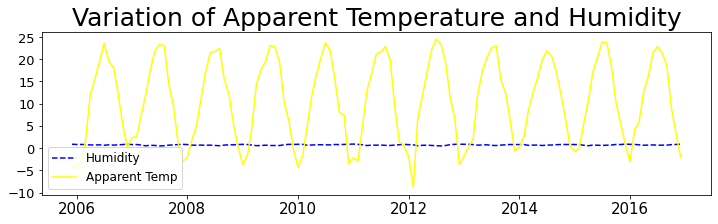

In [8]:
#analysis plot of temperature & humidity over the range of years in the dataset
plt.figure(figsize=(12,3));
plt.plot(data['Humidity'], label='Humidity',color='blue',linestyle='dashed');
plt.plot(data['Apparent Temperature (C)'],label='Apparent Temp',color='yellow');
plt.title('Variation of Apparent Temperature and Humidity',fontsize=25);
plt.legend(loc=0,fontsize=12);
plt.xticks(fontsize=15);
plt.yticks(fontsize=13);

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature (C)')

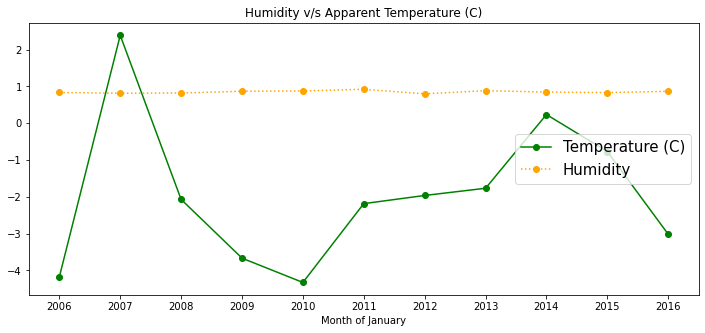

In [9]:
#humidity vs apparent temp monthly wise
jan=data[data.index.month==1];
plt.figure(figsize=(12,5));
plt.plot(jan.loc['2006-01-01':'2016-01-01','Apparent Temperature (C)'],marker='o',linestyle='-',color='green',label='Temperature (C)');
plt.plot(jan.loc['2006-01-01':'2016-01-01','Humidity'],marker='o',linestyle=':',color='orange',label='Humidity');
plt.legend(loc='center right',fontsize=15);
plt.xlabel('Month of January')
plt.title('Humidity v/s Apparent Temperature (C)')

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature (C)')

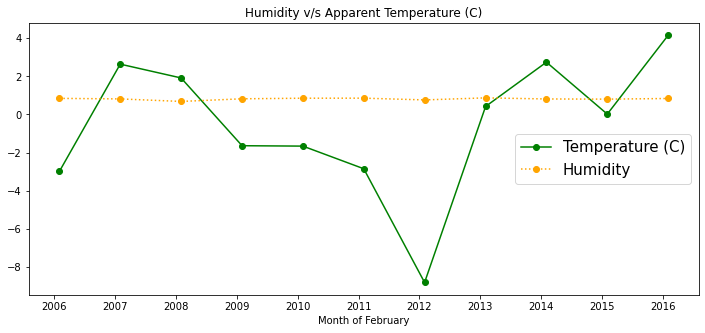

In [10]:
feb=data[data.index.month==2];
plt.figure(figsize=(12,5));
plt.plot(feb.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],marker='o',linestyle='-',color='green',label='Temperature (C)');
plt.plot(feb.loc['2006-02-01':'2016-02-01','Humidity'],marker='o',linestyle=':',color='orange',label='Humidity');
plt.legend(loc='center right',fontsize=15);
plt.xlabel('Month of February')
plt.title('Humidity v/s Apparent Temperature (C)')

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature (C)')

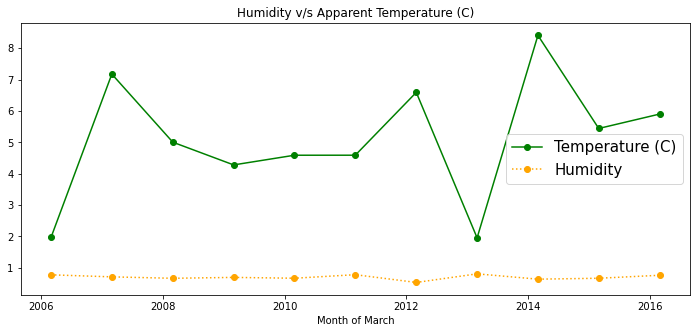

In [11]:
march=data[data.index.month==3];
plt.figure(figsize=(12,5));
plt.plot(march.loc['2006-03-01':'2016-03-01','Apparent Temperature (C)'],marker='o',linestyle='-',color='green',label='Temperature (C)');
plt.plot(march.loc['2006-03-01':'2016-03-01','Humidity'],marker='o',linestyle=':',color='orange',label='Humidity');
plt.legend(loc='center right',fontsize=15);
plt.xlabel('Month of March')
plt.title('Humidity v/s Apparent Temperature (C)')

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature (C)')

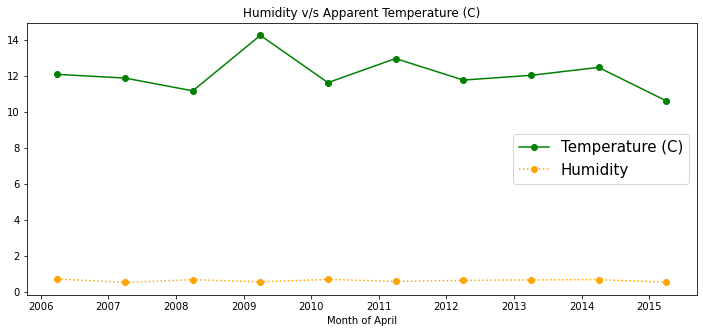

In [12]:
april=data[data.index.month==4];
plt.figure(figsize=(12,5));
plt.plot(april.loc['2006-01-01':'2016-01-01','Apparent Temperature (C)'],marker='o',linestyle='-',color='green',label='Temperature (C)');
plt.plot(april.loc['2006-01-01':'2016-01-01','Humidity'],marker='o',linestyle=':',color='orange',label='Humidity');
plt.legend(loc='center right',fontsize=15);
plt.xlabel('Month of April')
plt.title('Humidity v/s Apparent Temperature (C)')

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature (C)')

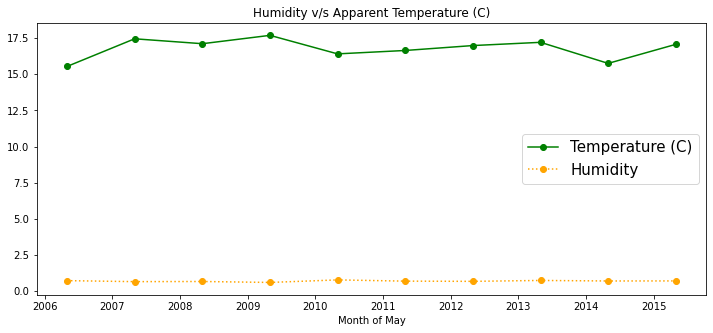

In [13]:
may=data[data.index.month==5];
plt.figure(figsize=(12,5));
plt.plot(may.loc['2006-01-01':'2016-01-01','Apparent Temperature (C)'],marker='o',linestyle='-',color='green',label='Temperature (C)');
plt.plot(may.loc['2006-01-01':'2016-01-01','Humidity'],marker='o',linestyle=':',color='orange',label='Humidity');
plt.legend(loc='center right',fontsize=15);
plt.xlabel('Month of May')
plt.title('Humidity v/s Apparent Temperature (C)')

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature (C)')

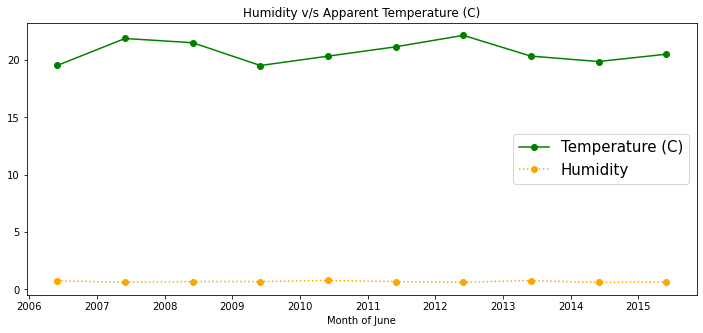

In [14]:
june=data[data.index.month==6];
plt.figure(figsize=(12,5));
plt.plot(june.loc['2006-01-01':'2016-01-01','Apparent Temperature (C)'],marker='o',linestyle='-',color='green',label='Temperature (C)');
plt.plot(june.loc['2006-01-01':'2016-01-01','Humidity'],marker='o',linestyle=':',color='orange',label='Humidity');
plt.legend(loc='center right',fontsize=15);
plt.xlabel('Month of June')
plt.title('Humidity v/s Apparent Temperature (C)')

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature (C)')

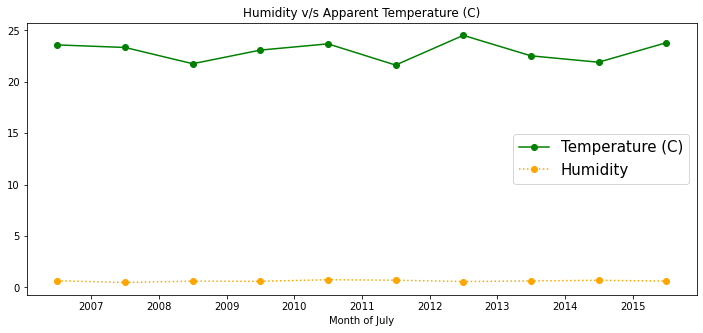

In [15]:
july=data[data.index.month==7];
plt.figure(figsize=(12,5));
plt.plot(july.loc['2006-01-01':'2016-01-01','Apparent Temperature (C)'],marker='o',linestyle='-',color='green',label='Temperature (C)');
plt.plot(july.loc['2006-01-01':'2016-01-01','Humidity'],marker='o',linestyle=':',color='orange',label='Humidity');
plt.legend(loc='center right',fontsize=15);
plt.xlabel('Month of July')
plt.title('Humidity v/s Apparent Temperature (C)')

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature (C)')

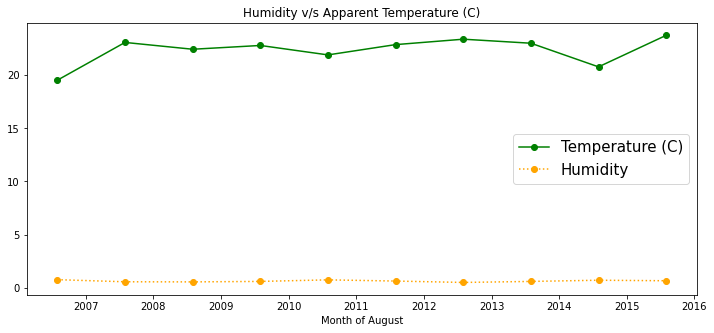

In [16]:
aug=data[data.index.month==8];
plt.figure(figsize=(12,5));
plt.plot(aug.loc['2006-01-01':'2016-01-01','Apparent Temperature (C)'],marker='o',linestyle='-',color='green',label='Temperature (C)');
plt.plot(aug.loc['2006-01-01':'2016-01-01','Humidity'],marker='o',linestyle=':',color='orange',label='Humidity');
plt.legend(loc='center right',fontsize=15);
plt.xlabel('Month of August')
plt.title('Humidity v/s Apparent Temperature (C)')

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature (C)')

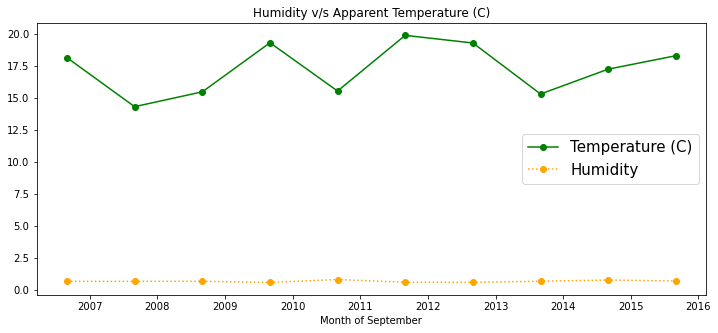

In [17]:
sep=data[data.index.month==9];
plt.figure(figsize=(12,5));
plt.plot(sep.loc['2006-01-01':'2016-01-01','Apparent Temperature (C)'],marker='o',linestyle='-',color='green',label='Temperature (C)');
plt.plot(sep.loc['2006-01-01':'2016-01-01','Humidity'],marker='o',linestyle=':',color='orange',label='Humidity');
plt.legend(loc='center right',fontsize=15);
plt.xlabel('Month of September')
plt.title('Humidity v/s Apparent Temperature (C)')

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature (C)')

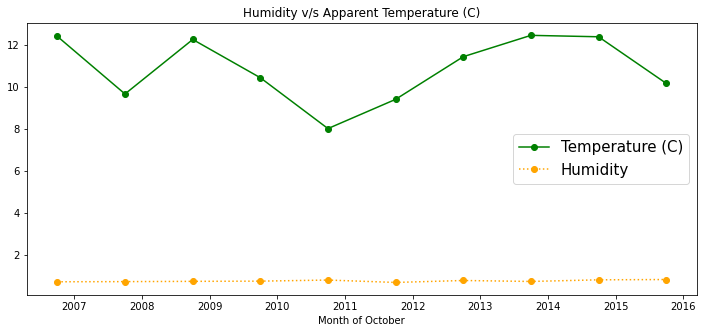

In [18]:
oct=data[data.index.month==10];
plt.figure(figsize=(12,5));
plt.plot(oct.loc['2006-01-01':'2016-01-01','Apparent Temperature (C)'],marker='o',linestyle='-',color='green',label='Temperature (C)');
plt.plot(oct.loc['2006-01-01':'2016-01-01','Humidity'],marker='o',linestyle=':',color='orange',label='Humidity');
plt.legend(loc='center right',fontsize=15);
plt.xlabel('Month of October')
plt.title('Humidity v/s Apparent Temperature (C)')

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature (C)')

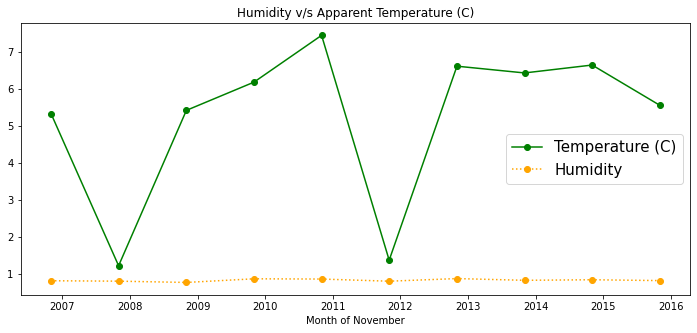

In [19]:
nov=data[data.index.month==11];
plt.figure(figsize=(12,5));
plt.plot(nov.loc['2006-01-01':'2016-01-01','Apparent Temperature (C)'],marker='o',linestyle='-',color='green',label='Temperature (C)');
plt.plot(nov.loc['2006-01-01':'2016-01-01','Humidity'],marker='o',linestyle=':',color='orange',label='Humidity');
plt.legend(loc='center right',fontsize=15);
plt.xlabel('Month of November')
plt.title('Humidity v/s Apparent Temperature (C)')

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature (C)')

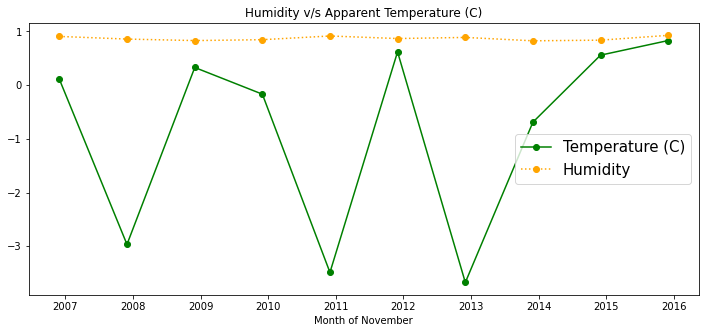

In [20]:
dec=data[data.index.month==12];
plt.figure(figsize=(12,5));
plt.plot(dec.loc['2006-01-01':'2016-01-01','Apparent Temperature (C)'],marker='o',linestyle='-',color='green',label='Temperature (C)');
plt.plot(dec.loc['2006-01-01':'2016-01-01','Humidity'],marker='o',linestyle=':',color='orange',label='Humidity');
plt.legend(loc='center right',fontsize=15);
plt.xlabel('Month of November')
plt.title('Humidity v/s Apparent Temperature (C)')

In [23]:
A=np.arange(10,19).reshape((3,3))
print(A[0,:])
print(A[:,0])

[10 11 12]
[10 13 16]


In [27]:
x = np.arange(16.0).reshape(4, 4)
np.vsplit(x, 2)


[array([[0., 1., 2., 3.],
        [4., 5., 6., 7.]]),
 array([[ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])]

In [28]:
b=np.array([[1.3,2.4],[0.3,4.1]])
print(b.dtype)
print(b.ndim)
print(b.size)
print(b.shape)

float64
2
4
(2, 2)
